Project testing

In [2]:
# Import necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV
import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from sklearn.utils.class_weight import compute_class_weight
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier


In [3]:
df= pd.read_csv("C:/Users/User/OneDrive/Documents/Flatiron/Coursework/Phase 5 Capstone/FinalProject/final_project/Data/reduced_reddit.csv")
df.info()
df.describe()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98826 entries, 0 to 98825
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   subreddit     98826 non-null  object 
 1   title         98826 non-null  object 
 2   body          80371 non-null  object 
 3   upvotes       98826 non-null  float64
 4   created_utc   98826 non-null  float64
 5   num_comments  94297 non-null  float64
 6   label         98826 non-null  float64
dtypes: float64(4), object(3)
memory usage: 5.3+ MB


subreddit           0
title               0
body            18455
upvotes             0
created_utc         0
num_comments     4529
label               0
dtype: int64

In [4]:
df.head(5)

,subreddit,title,body,upvotes,created_utc,num_comments,label
0,teenagers,Day 18 of doing 50 push-ups,NaN,4.0,1.619357e+09,4.0,0.0
1,teenagers,There isn’t a better feeling than finishing yo...,Then your teacher hits you with that “ Good jo...,7.0,1.554103e+09,NaN,0.0
2,teenagers,LMAOOO I can only get this guy to talk to me i...,Yeahhh maybe not babe,4.0,1.649342e+09,12.0,0.0
3,teenagers,This isn't going to work out,NaN,236.0,1.417630e+09,33.0,0.0
4,teenagers,Am I the only guy who found it hurtful as a ch...,\n\nLike... why? How is that funny? How does ...,6.0,1.569280e+09,4.0,0.0


In [5]:
# Count unique subreddits
unique_subreddits = df['subreddit'].nunique()
print(f"Number of unique subreddits: {unique_subreddits}")

# List unique subreddits
subreddit_categories = df['subreddit'].unique()
print(f"Subreddit categories: {subreddit_categories}")


Number of unique subreddits: 5
Subreddit categories: ['teenagers' 'DeepThoughts' 'happy' 'depression' 'SuicideWatch']


In [6]:
# Convert 'created_utc' from float to readable datetime
df['created_utc'] = pd.to_datetime(df['created_utc'], unit='s')

In [7]:
# Analyze label distribution by subreddit
label_analysis = df.groupby('subreddit')['label'].value_counts().unstack(fill_value=0)

# Show the analysis of labels by subreddit
print(label_analysis)

label           0.0    1.0
subreddit                 
DeepThoughts    364      0
SuicideWatch      0   7544
depression        0  11672
happy           995      0
teenagers     78251      0


In [8]:
df.head(5)

,subreddit,title,body,upvotes,created_utc,num_comments,label
0,teenagers,Day 18 of doing 50 push-ups,NaN,4.0,2021-04-25 13:25:39,4.0,0.0
1,teenagers,There isn’t a better feeling than finishing yo...,Then your teacher hits you with that “ Good jo...,7.0,2019-04-01 07:19:57,NaN,0.0
2,teenagers,LMAOOO I can only get this guy to talk to me i...,Yeahhh maybe not babe,4.0,2022-04-07 14:35:00,12.0,0.0
3,teenagers,This isn't going to work out,NaN,236.0,2014-12-03 18:12:52,33.0,0.0
4,teenagers,Am I the only guy who found it hurtful as a ch...,\n\nLike... why? How is that funny? How does ...,6.0,2019-09-23 23:07:59,4.0,0.0


EDA : Examples

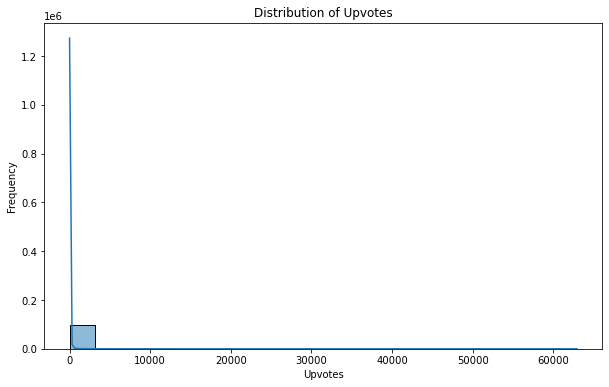

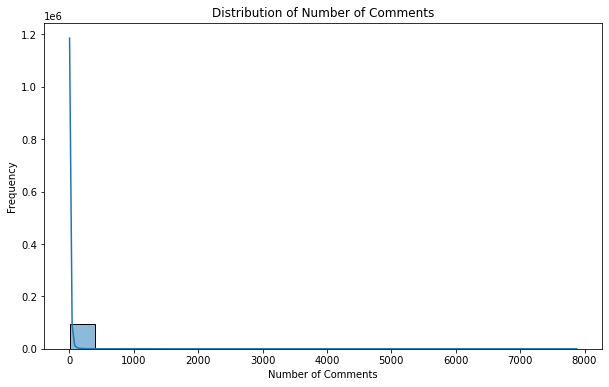

In [9]:

# Histogram of upvotes
plt.figure(figsize=(10,6))
sns.histplot(df['upvotes'], kde=True, bins=20)
plt.title('Distribution of Upvotes')
plt.xlabel('Upvotes')
plt.ylabel('Frequency')
plt.show()

# Histogram of num_comments
plt.figure(figsize=(10,6))
sns.histplot(df['num_comments'], kde=True, bins=20)
plt.title('Distribution of Number of Comments')
plt.xlabel('Number of Comments')
plt.ylabel('Frequency')
plt.show()


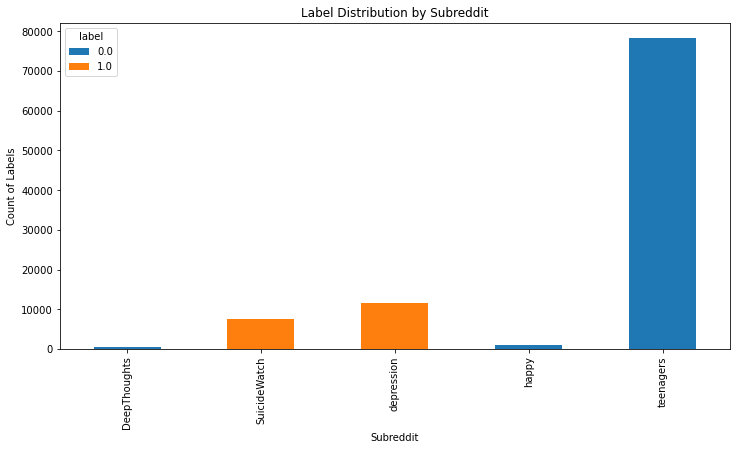

In [10]:
# Bar plot for label distribution by subreddit
label_distribution = df.groupby('subreddit')['label'].value_counts().unstack().fillna(0)
label_distribution.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Label Distribution by Subreddit')
plt.xlabel('Subreddit')
plt.ylabel('Count of Labels')
plt.show()


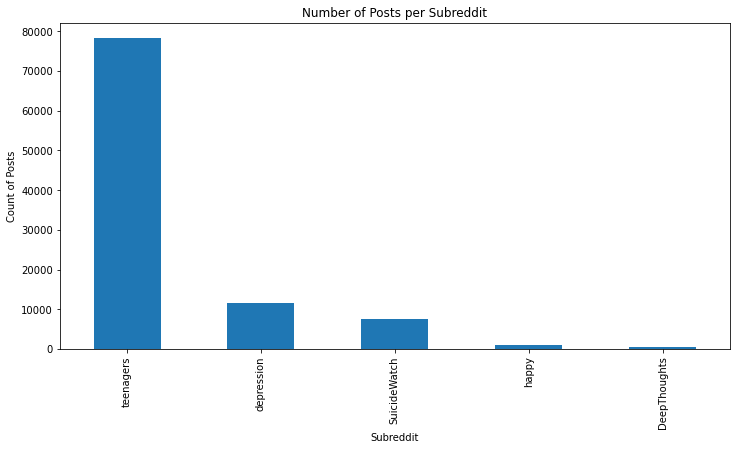

In [11]:
# Count the number of posts per subreddit
plt.figure(figsize=(12, 6))
df['subreddit'].value_counts().plot(kind='bar')
plt.title('Number of Posts per Subreddit')
plt.xlabel('Subreddit')
plt.ylabel('Count of Posts')
plt.show()


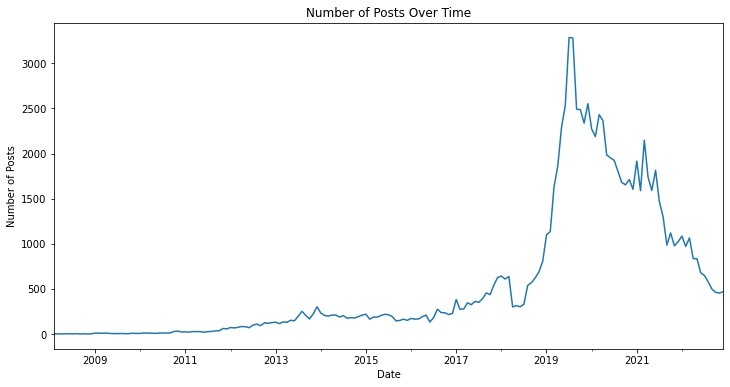

In [12]:
# Plot number of posts over time
df['created_utc'] = pd.to_datetime(df['created_utc'], unit='s')
df.set_index('created_utc', inplace=True)

# Plot number of posts per month
df.resample('M').size().plot(figsize=(12, 6))
plt.title('Number of Posts Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Posts')
plt.show()


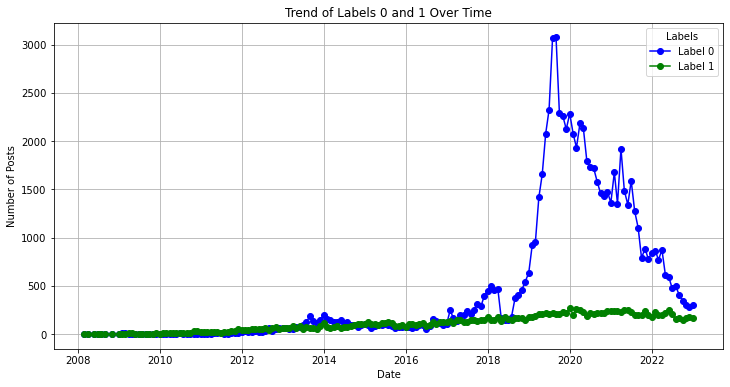

In [15]:

# Resample the data by month (change this to 'W' for weekly or 'D' for daily)
label_trend = df.resample('M')['label'].value_counts().unstack().fillna(0)

# Plot the trend over time for both labels
plt.figure(figsize=(12, 6))
plt.plot(label_trend.index, label_trend[0], label='Label 0', color='blue', marker='o')
plt.plot(label_trend.index, label_trend[1], label='Label 1', color='green', marker='o')

# Adding titles and labels
plt.title('Trend of Labels 0 and 1 Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Posts')
plt.legend(title='Labels')
plt.grid(True)

# Show the plot
plt.show()

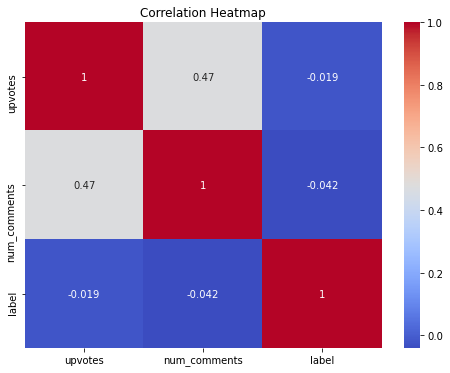

In [13]:
# Correlation heatmap between numeric variables
plt.figure(figsize=(8,6))
sns.heatmap(df[['upvotes', 'num_comments', 'label']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()
